In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df= pd.read_csv(r"C:\Users\USER PC\Downloads\heart_attack_russia.csv")
df.head()

Patient_ID  Age Gender  Blood_Pressure  Cholesterol Smoking  \
0           1   68   Male              95          253      No   
1           2   81   Male             165          237     Yes   
2           3   58   Male             173          169     Yes   
3           4   44   Male             176          275     Yes   
4           5   72   Male             119          247     Yes   

  Alcohol_Consumption Physical_Activity Obesity Diabetes  ... Heart_Rate  \
0                 Low          Moderate     Yes       No  ...         73   
1            Moderate          Moderate     Yes       No  ...         82   
2            Moderate               Low      No       No  ...        112   
3                 Low              High      No       No  ...         74   
4            Moderate               Low     Yes      Yes  ...         66   

   Exercise_Hours_Per_Week       Diet  Hypertension Medication_Use  \
0                        5  Unhealthy           Yes            Yes   
1                        4    Average           Yes             No   
2                        8    Average            No             No   
3                        1  Unhealthy           Yes            Yes   
4                        7  Unhealthy            No             No   

  Employment_Status Income_Level Marital_Status Previous_Heart_Attack  \
0          Employed       Middle        Widowed                    No   
1           Retired       Middle         Single                    No   
2           Retired          Low        Married                    No   
3          Employed       Middle         Single                    No   
4           Retired       Middle         Single                    No   

  Heart_Attack_Risk  
0          Moderate  
1              High  
2              High  
3          Moderate  
4               Low  

[5 rows x 22 columns]

Dataset Shape: (10000, 22)

Data Types:
 Patient_ID                  int64
Age                         int64
Gender                     object
Blood_Pressure              int64
Cholesterol                 int64
Smoking                    object
Alcohol_Consumption        object
Physical_Activity          object
Obesity                    object
Diabetes                   object
Family_History             object
Stress_Levels               int64
Heart_Rate                  int64
Exercise_Hours_Per_Week     int64
Diet                       object
Hypertension               object
Medication_Use             object
Employment_Status          object
Income_Level               object
Marital_Status             object
Previous_Heart_Attack      object
Heart_Attack_Risk          object
dtype: object

Summary Statistics for Numerical Variables:
        Patient_ID           Age  Blood_Pressure   Cholesterol  Stress_Levels  \
count  10000.00000  10000.000000    10000.000000  10000.000000   10000.

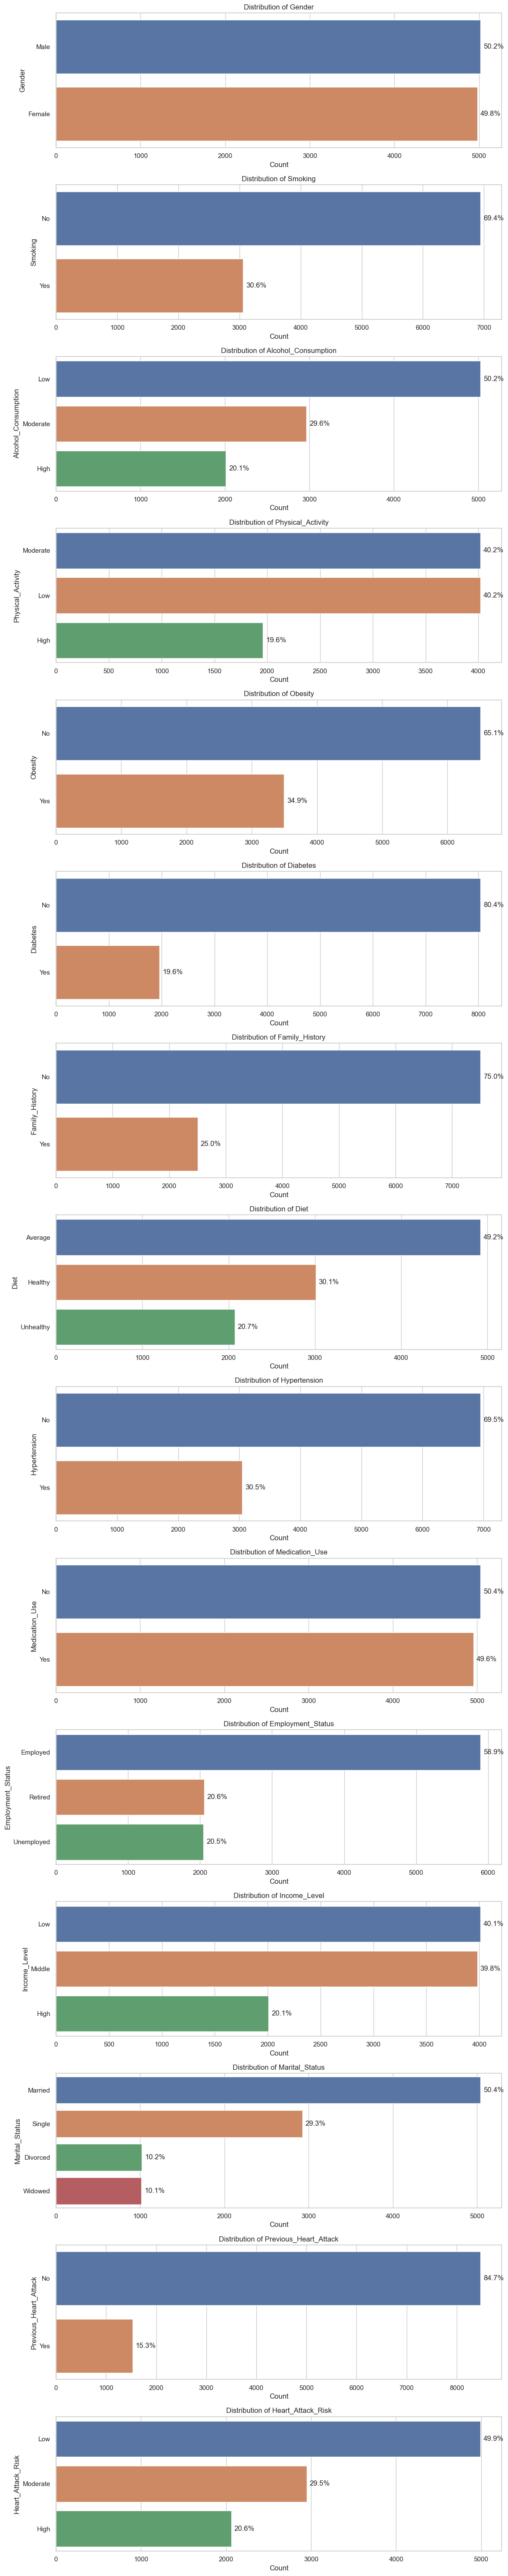

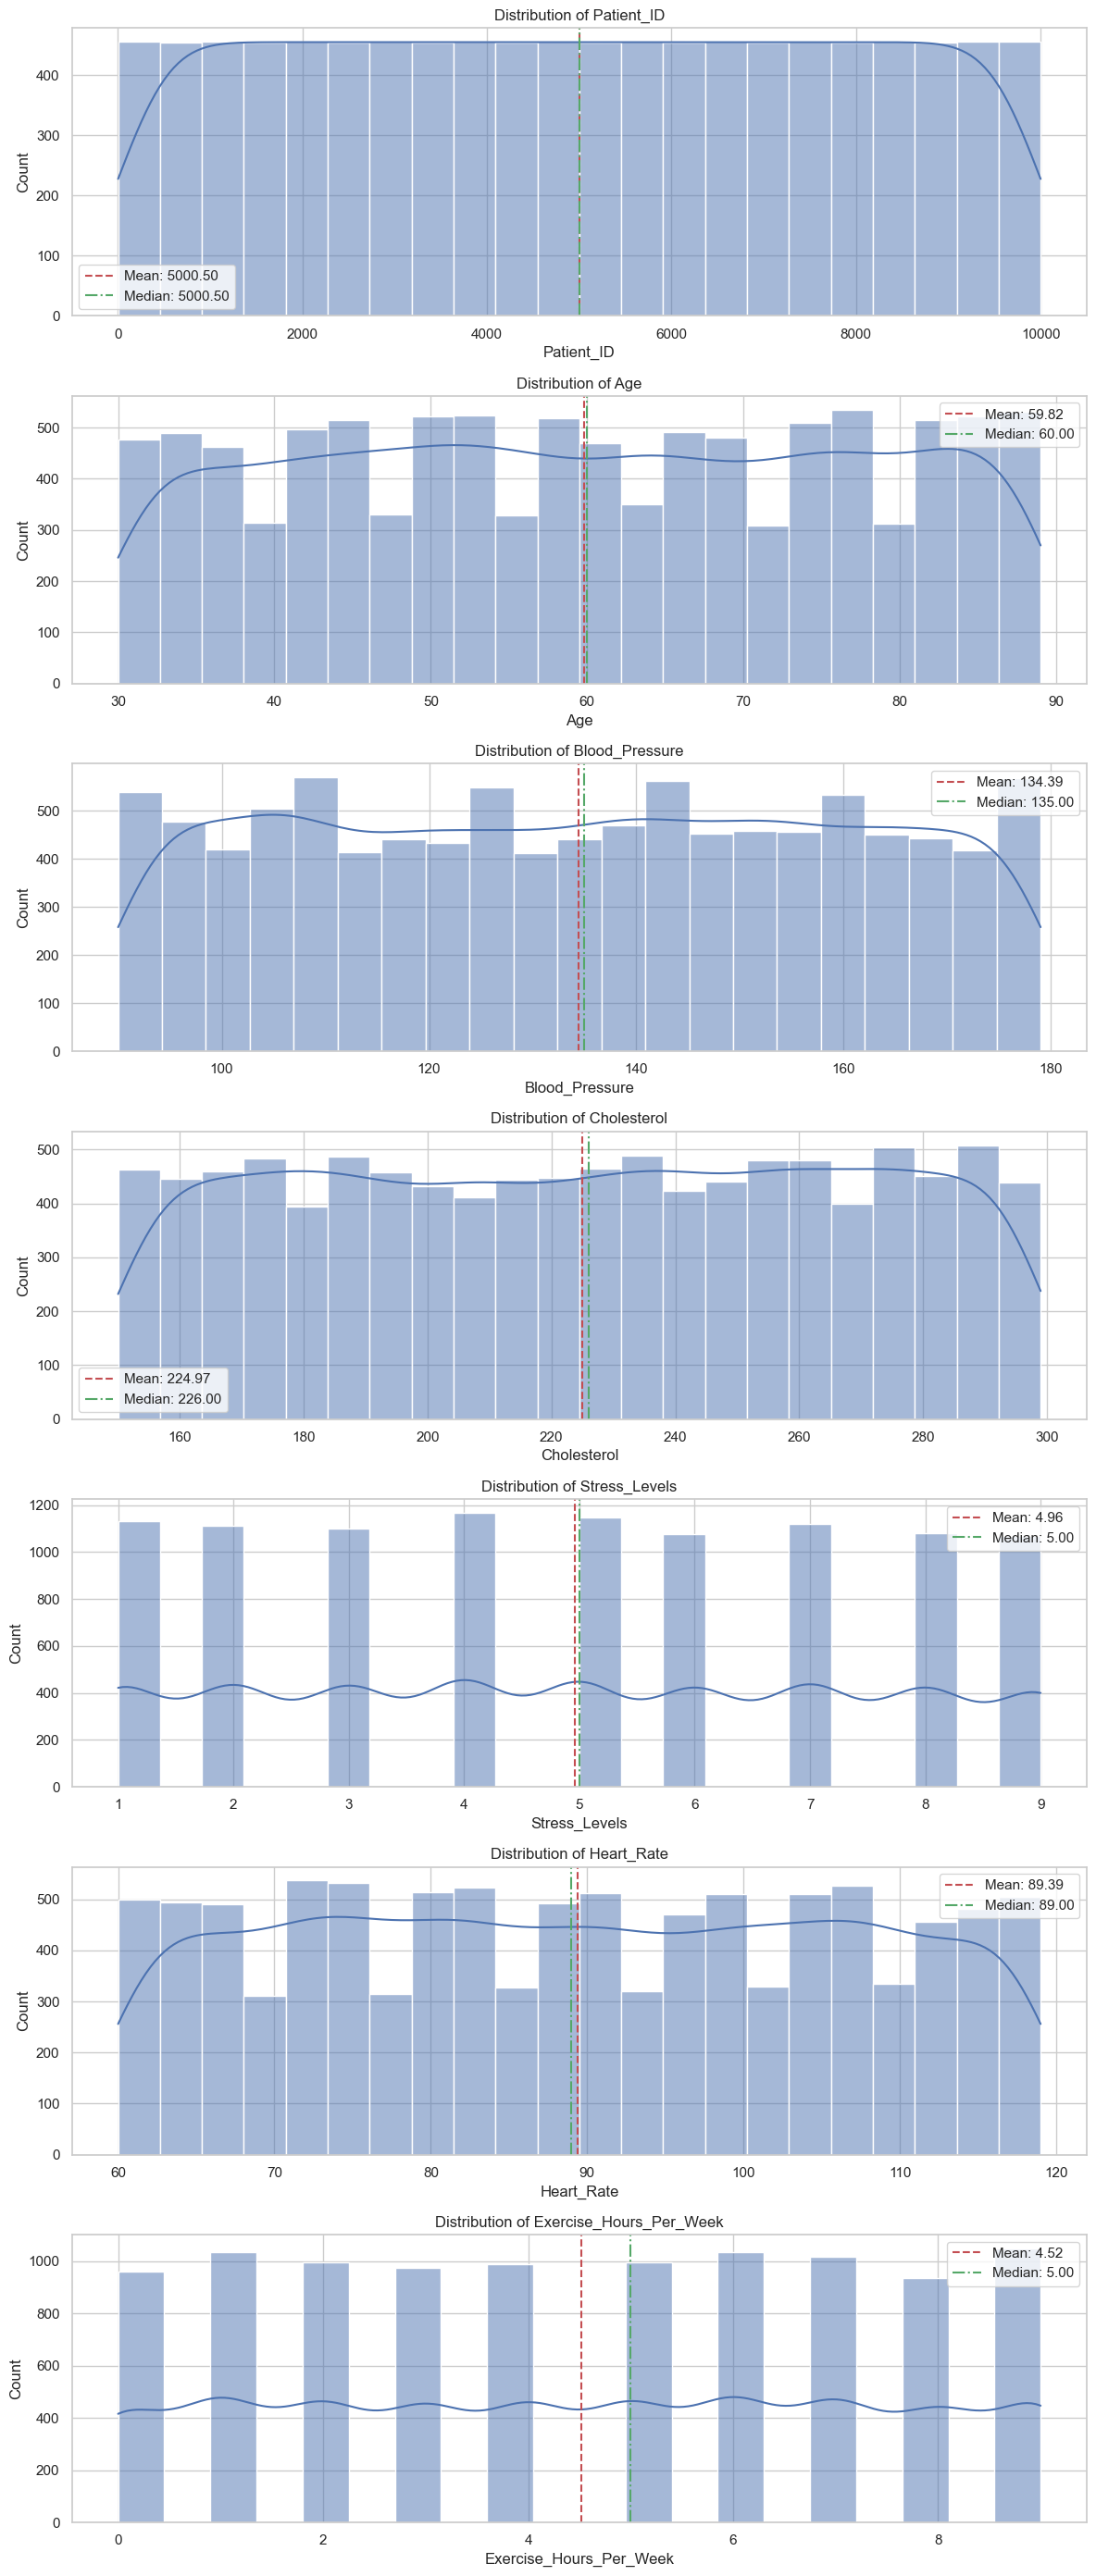

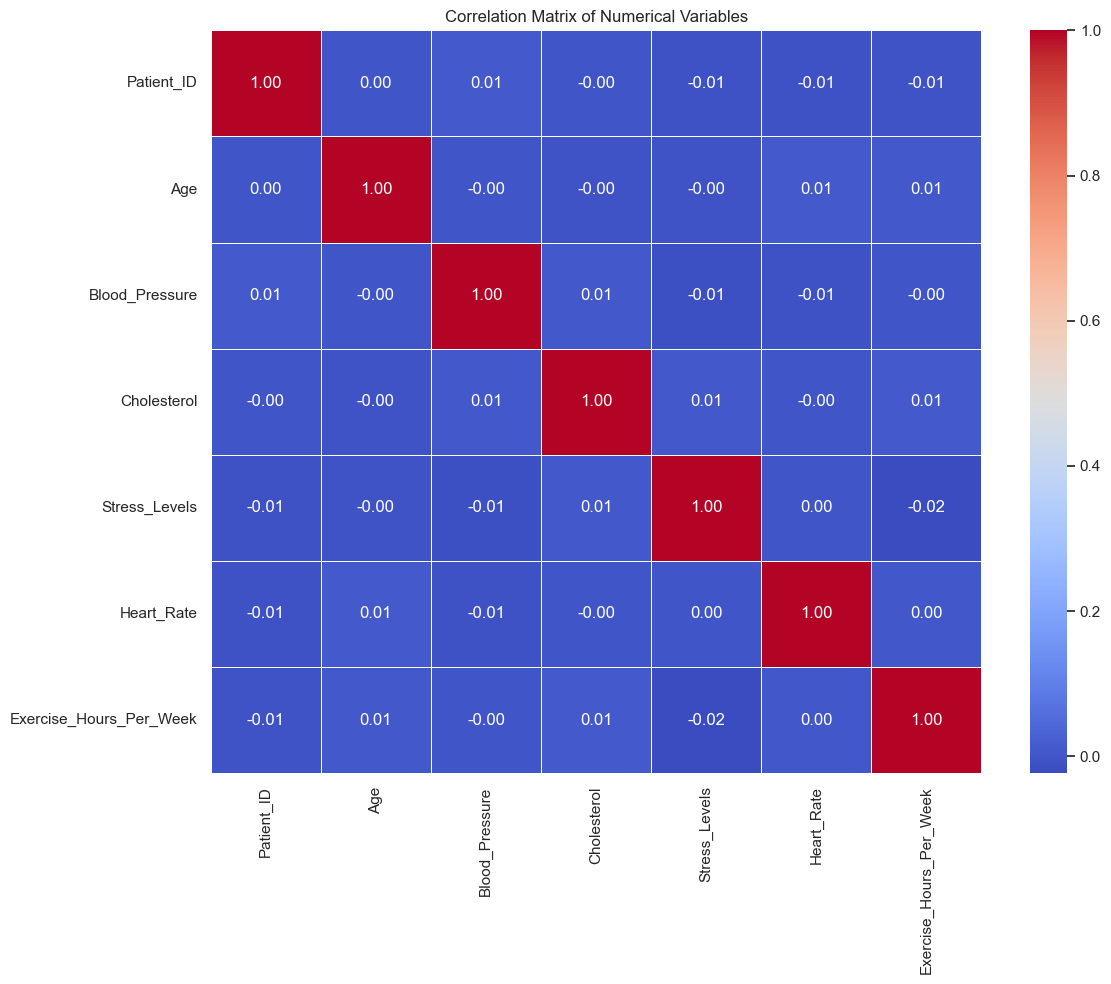

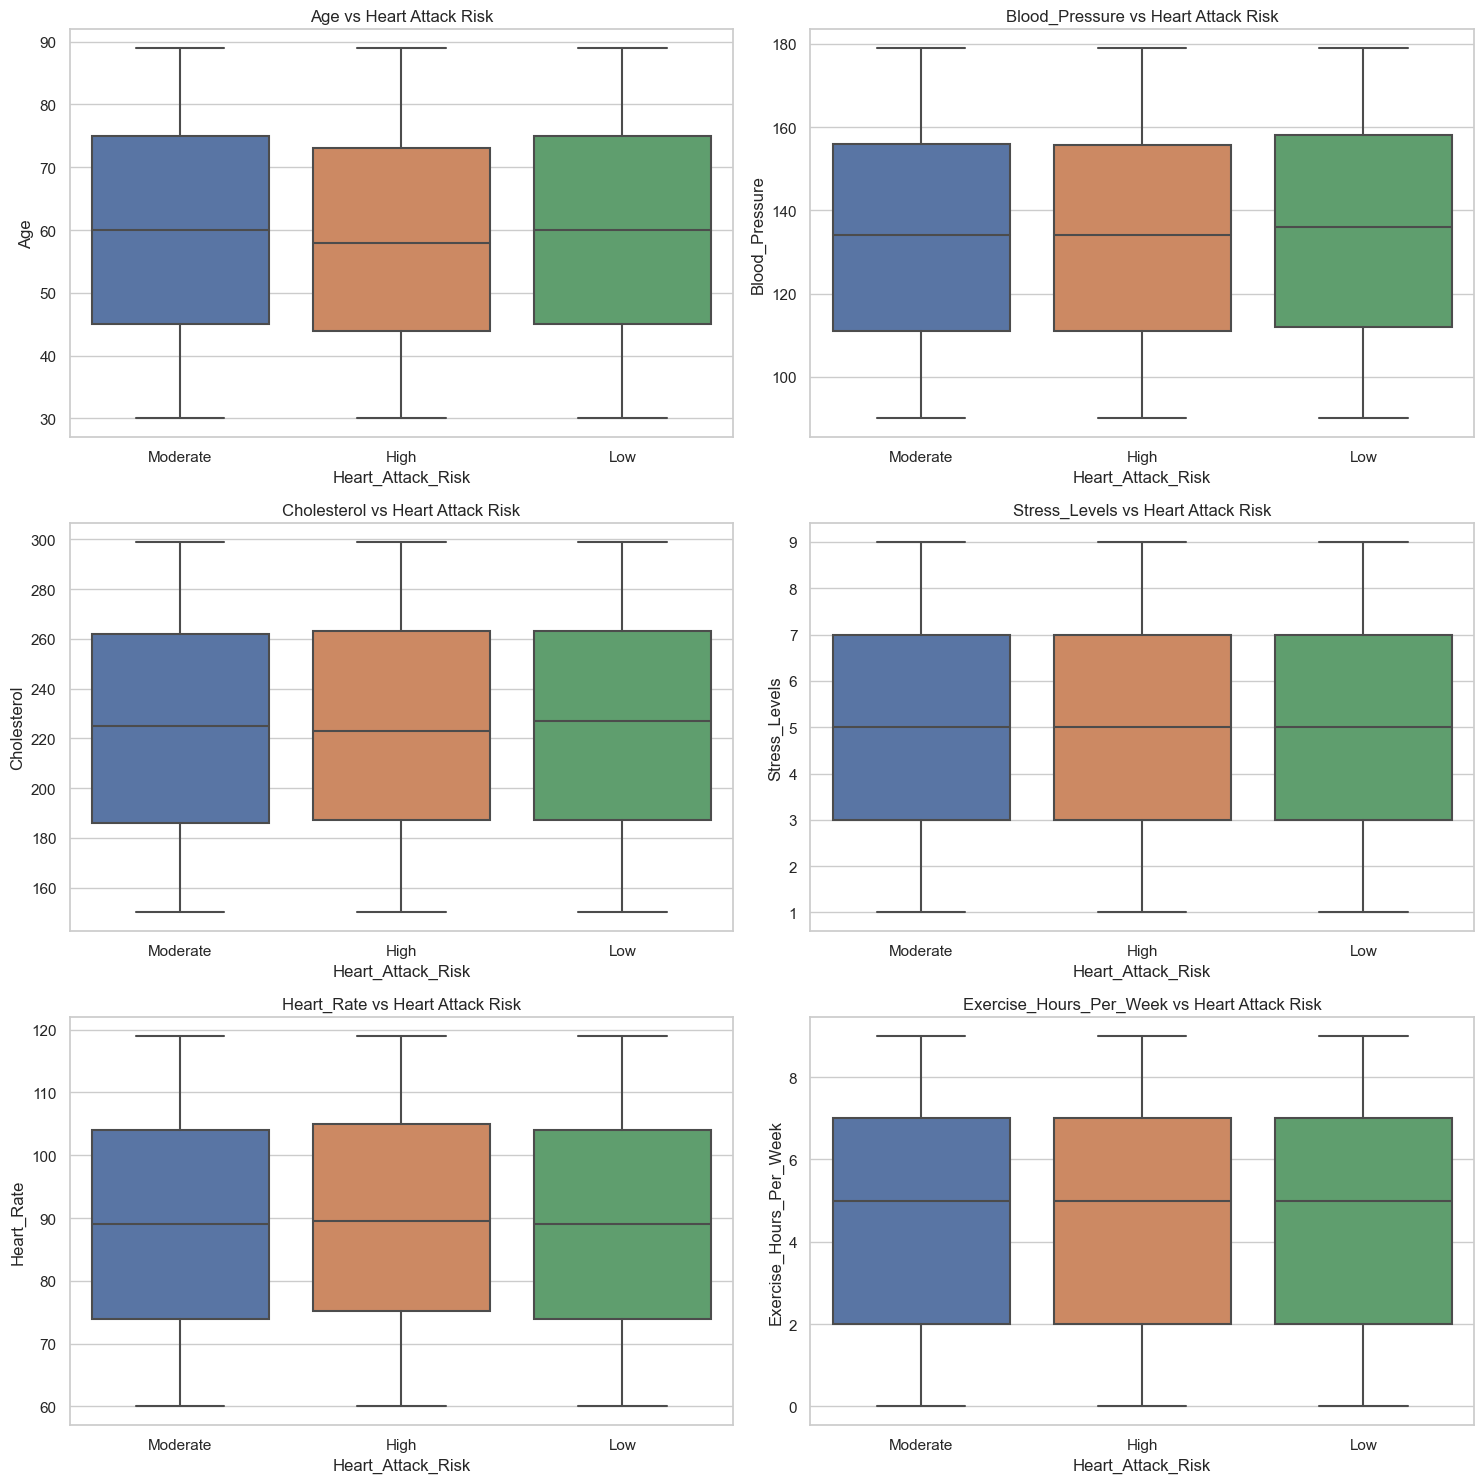

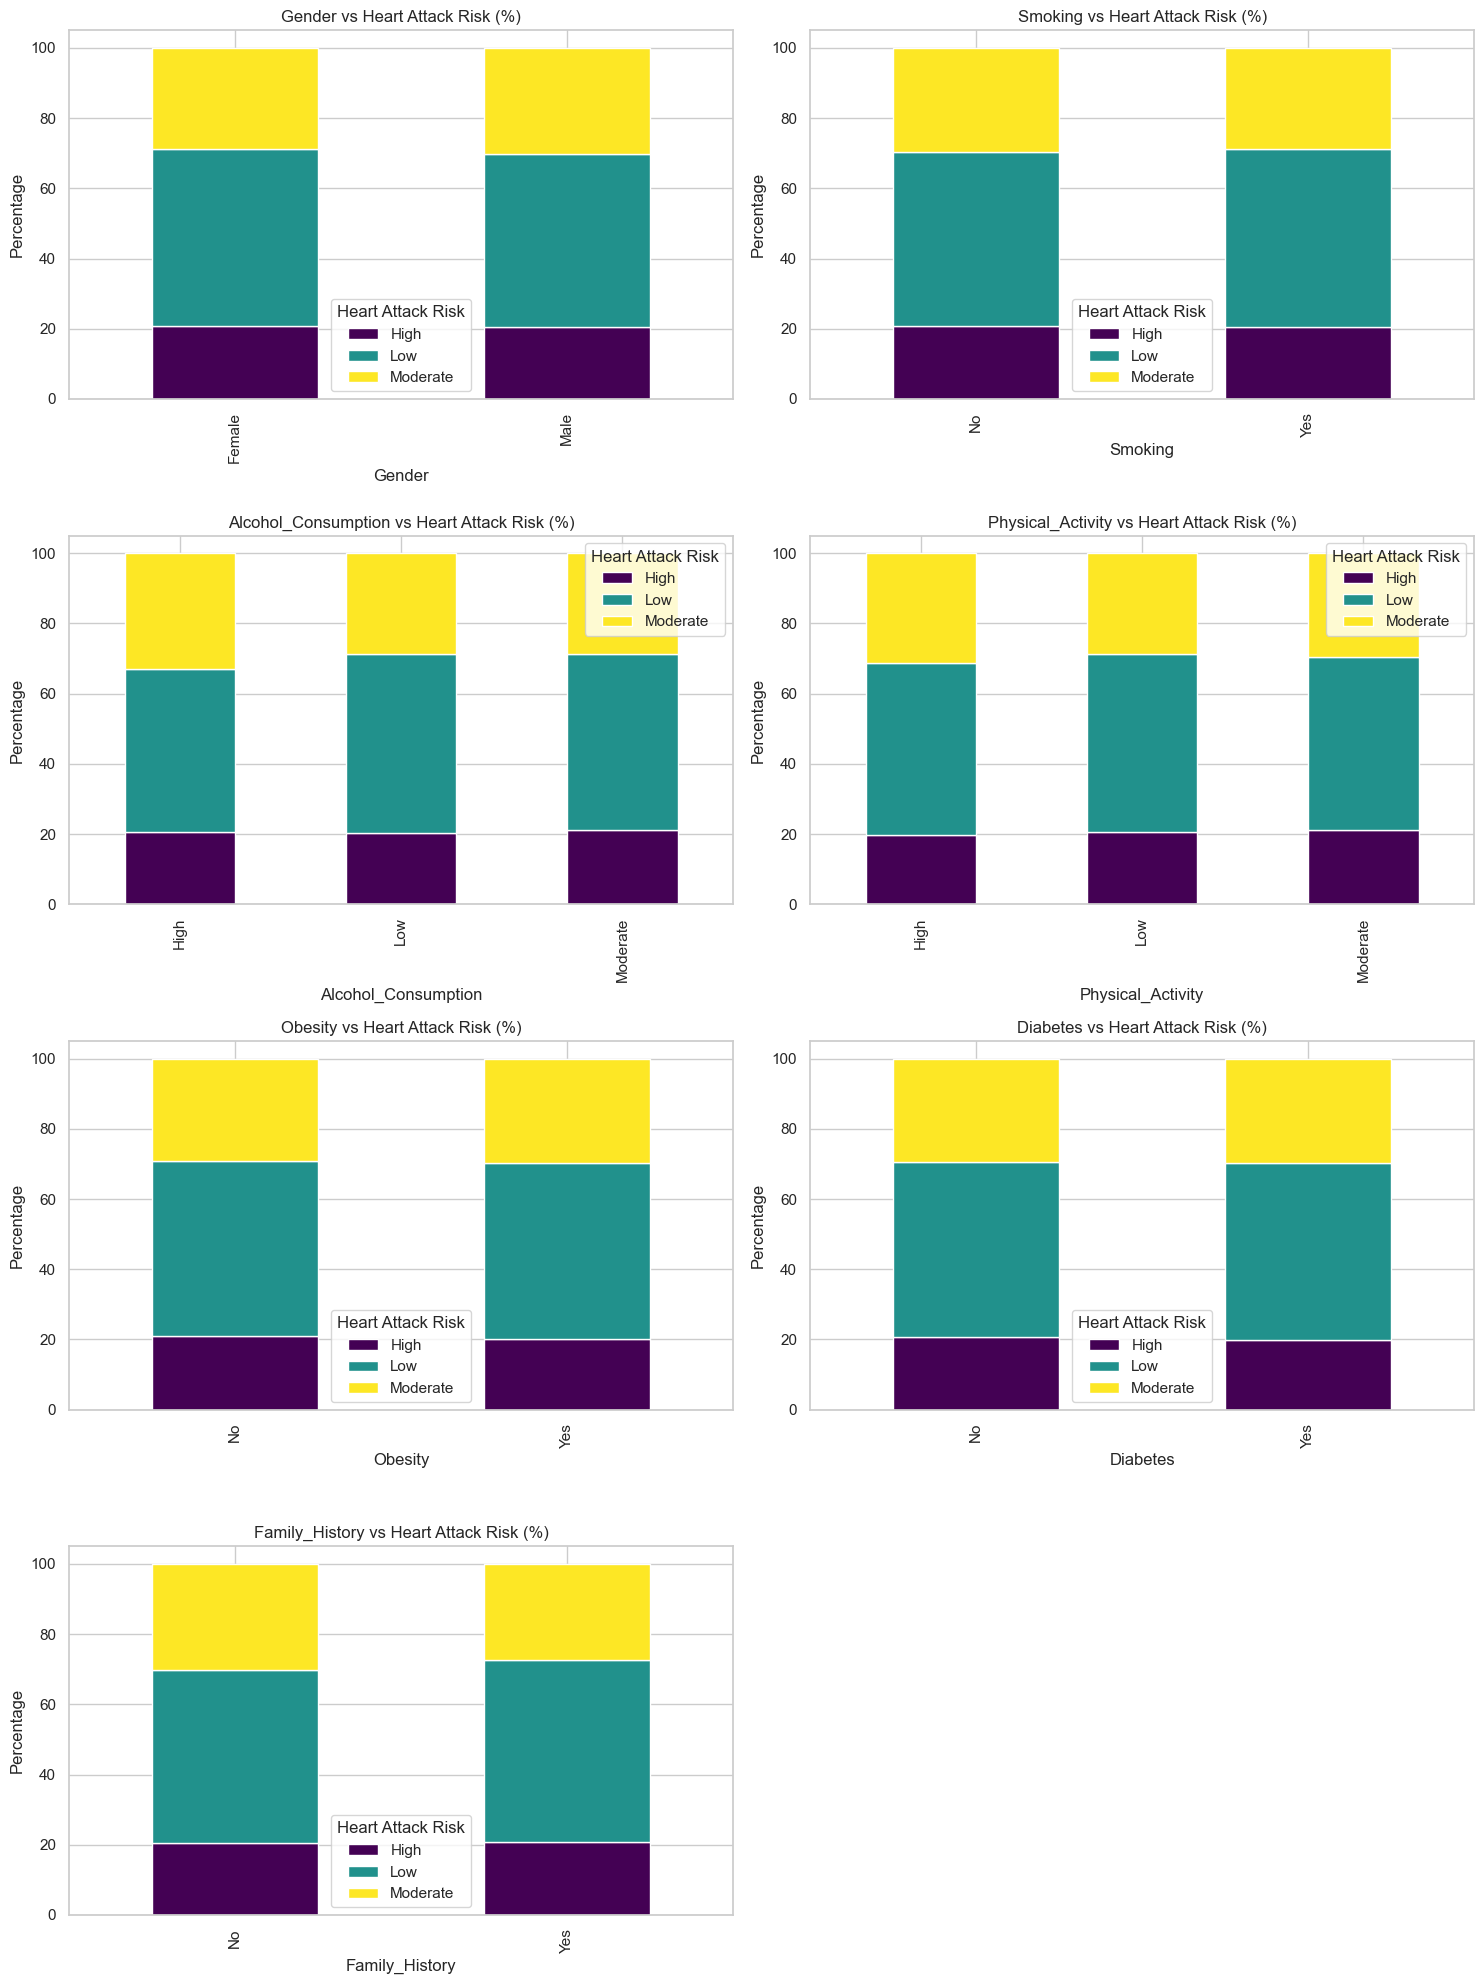

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


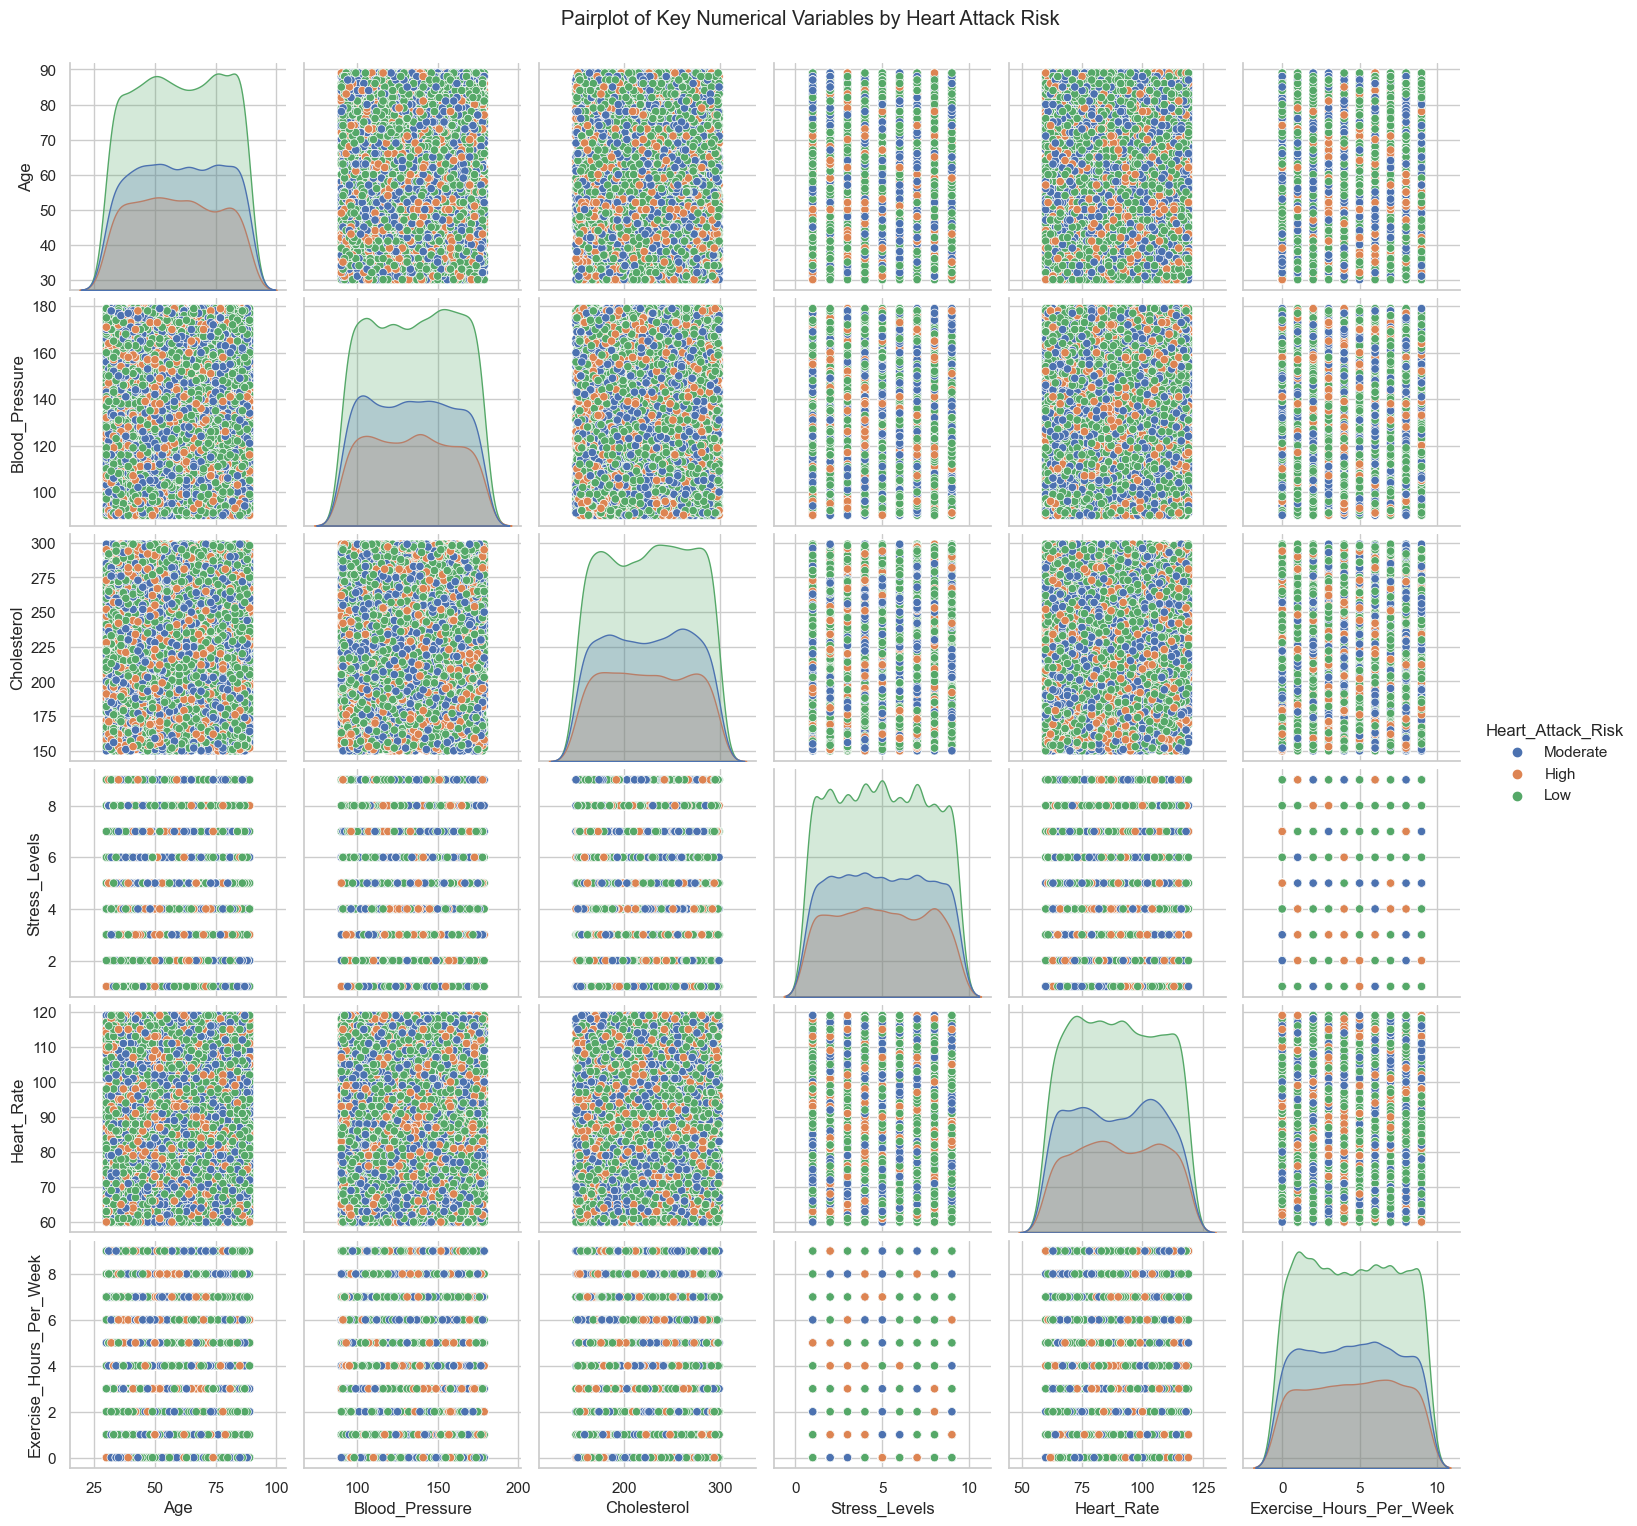

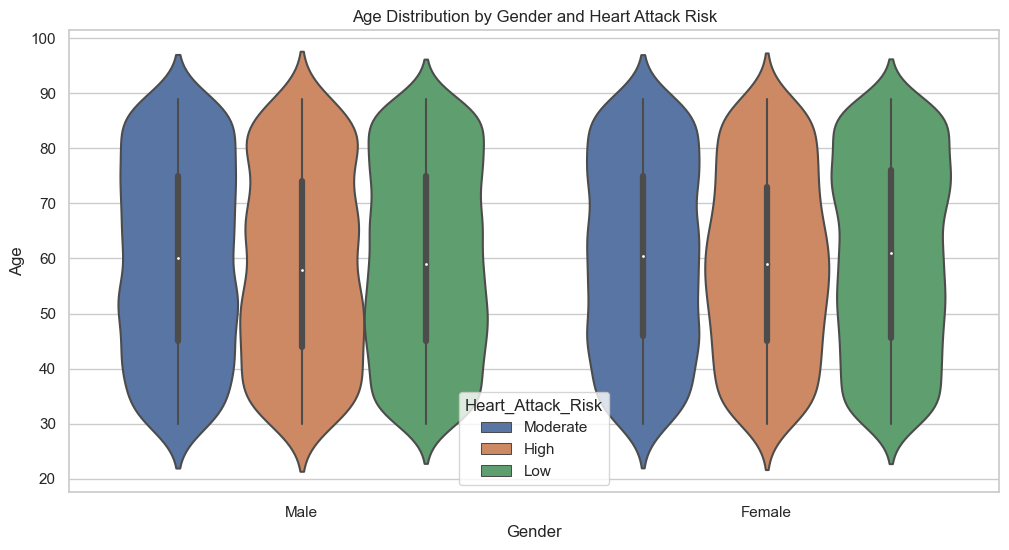

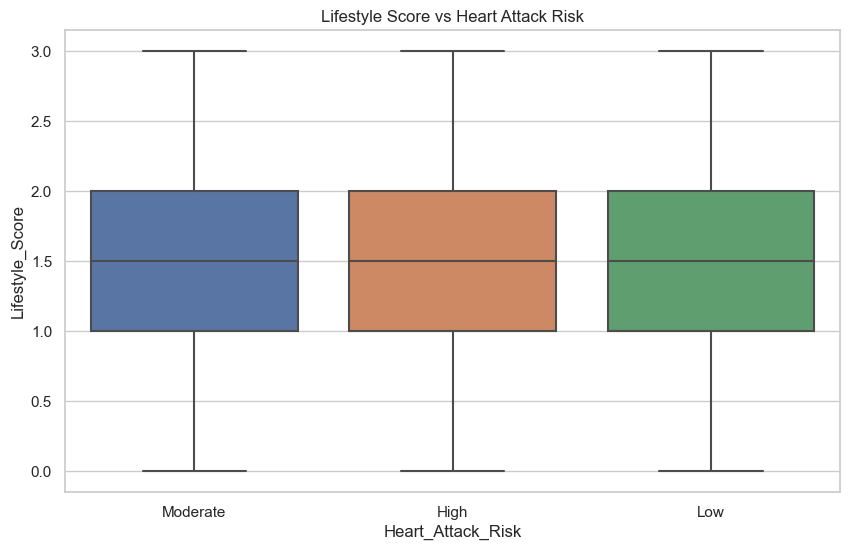

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set the style and figure size for better visualization
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Basic Data Overview
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics for Numerical Variables:")
print(df.describe())

# 2. Missing Values Analysis
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("\nMissing Values:\n", missing_values[missing_values > 0])
    
    # Visualize missing values
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.tight_layout()
    plt.show()

# 3. Categorical Variables Analysis
categorical_cols = df.select_dtypes(include=['object']).columns

fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(12, 4*len(categorical_cols)))
for i, col in enumerate(categorical_cols):
    sns.countplot(y=col, data=df, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    
    # Add percentages
    total = len(df[col])
    for p in axes[i].patches:
        percentage = f'{100 * p.get_width() / total:.1f}%'
        axes[i].annotate(percentage, (p.get_width(), p.get_y() + p.get_height()/2), 
                         ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

# 4. Numerical Variables Analysis
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Histograms for numerical variables
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(12, 4*len(numerical_cols)))
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[i].axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='g', linestyle='-.', label=f'Median: {median_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# 5. Correlation Analysis for Numerical Variables
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

# 6. Relationship between Heart Attack Risk and Key Variables
# Numerical variables vs Heart Attack Risk
numerical_cols = ['Age', 'Blood_Pressure', 'Cholesterol', 'Stress_Levels', 'Heart_Rate', 'Exercise_Hours_Per_Week']

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x='Heart_Attack_Risk', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Heart Attack Risk')

plt.tight_layout()
plt.show()

# 7. Categorical variables vs Heart Attack Risk
categorical_risk_cols = ['Gender', 'Smoking', 'Alcohol_Consumption', 'Physical_Activity', 
                         'Obesity', 'Diabetes', 'Family_History']

fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_risk_cols):
    if i < len(axes):
        # Create a crosstab
        ct = pd.crosstab(df[col], df['Heart_Attack_Risk'])
        # Convert to percentages
        ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
        
        # Plot
        ct_pct.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis')
        axes[i].set_title(f'{col} vs Heart Attack Risk (%)')
        axes[i].set_ylabel('Percentage')
        axes[i].legend(title='Heart Attack Risk')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# 8. Pairplot for key numerical variables
sns.pairplot(df[numerical_cols + ['Heart_Attack_Risk']], hue='Heart_Attack_Risk')
plt.suptitle('Pairplot of Key Numerical Variables by Heart Attack Risk', y=1.02)
plt.show()

# 9. Age and Gender Analysis
plt.figure(figsize=(12, 6))
sns.violinplot(x='Gender', y='Age', hue='Heart_Attack_Risk', data=df)
plt.title('Age Distribution by Gender and Heart Attack Risk')
plt.show()

# 10. Multivariate Analysis: Lifestyle Factors
# Create a lifestyle score based on smoking, alcohol, physical activity, and diet
lifestyle_map = {
    'Smoking': {'Yes': 0, 'No': 1},
    'Alcohol_Consumption': {'Frequent': 0, 'Occasional': 0.5, 'Never': 1},
    'Physical_Activity': {'High': 1, 'Moderate': 0.5, 'Low': 0},
    'Diet': {'Healthy': 1, 'Average': 0.5, 'Unhealthy': 0}
}

# Create lifestyle score (if these columns exist)
if all(col in df.columns for col in lifestyle_map.keys()):
    for col, mapping in lifestyle_map.items():
        df[f'{col}_Score'] = df[col].map(mapping)
    
    df['Lifestyle_Score'] = df[[f'{col}_Score' for col in lifestyle_map.keys()]].sum(axis=1)
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Heart_Attack_Risk', y='Lifestyle_Score', data=df)
    plt.title('Lifestyle Score vs Heart Attack Risk')
    plt.show()

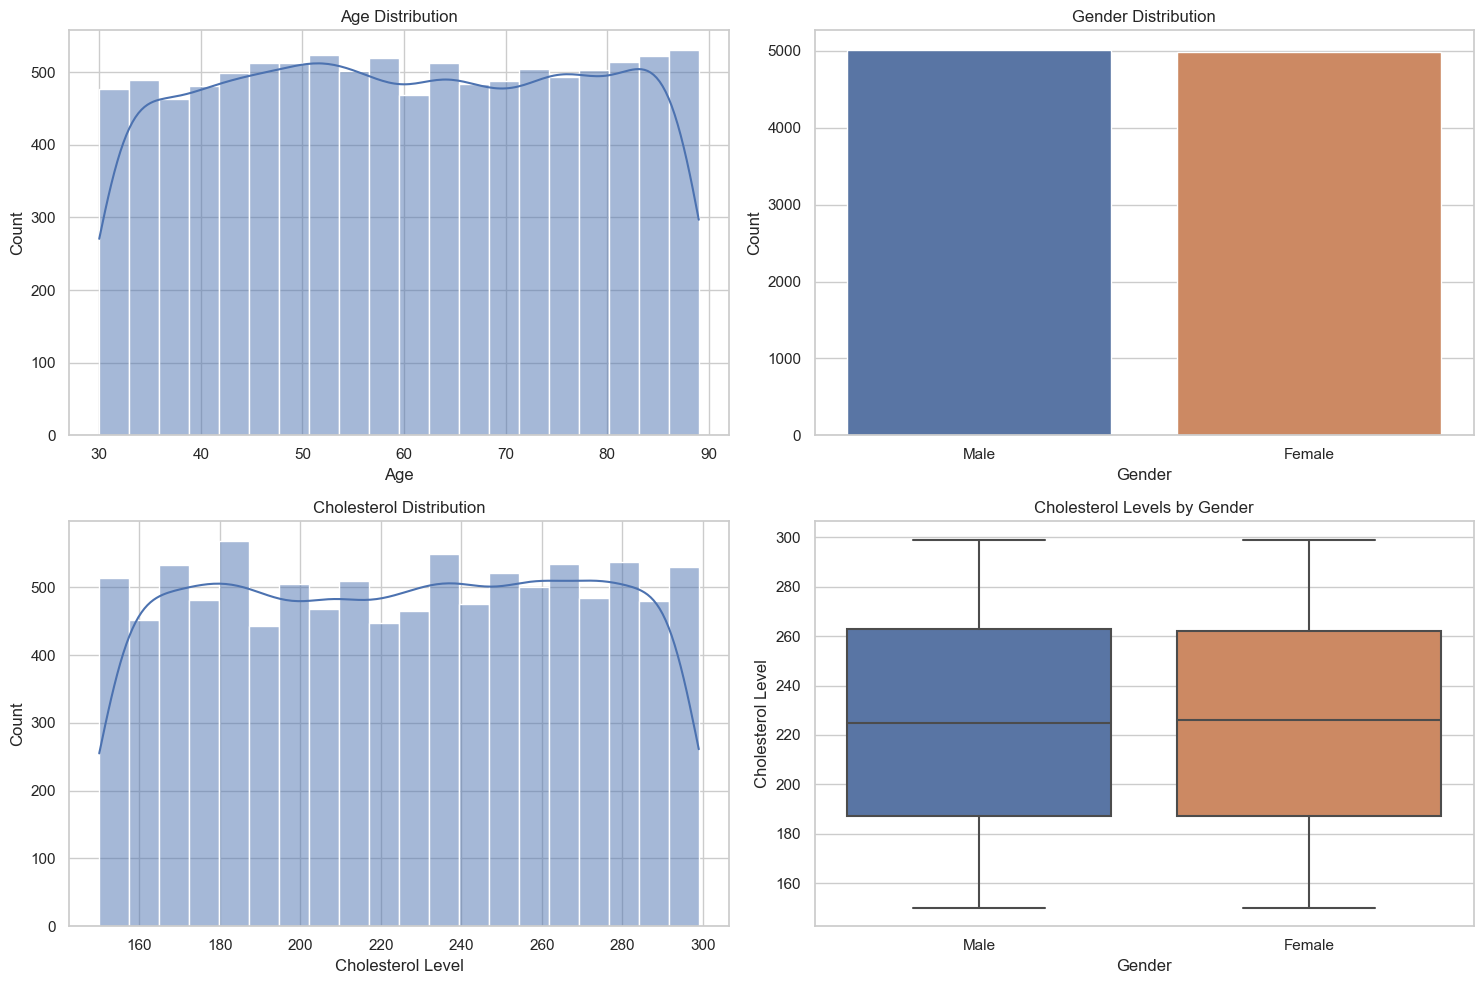

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))

# 1. Age Distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# 2. Gender Distribution
plt.subplot(2, 2, 2)
gender_counts = df['Gender'].value_counts()
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# 3. Cholesterol Levels Distribution
plt.subplot(2, 2, 3)
sns.histplot(df['Cholesterol'], bins=20, kde=True)
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol Level')
plt.ylabel('Count')

# 4. Cholesterol Levels by Gender (Boxplot)
plt.subplot(2, 2, 4)
sns.boxplot(x='Gender', y='Cholesterol', data=df)
plt.title('Cholesterol Levels by Gender')
plt.xlabel('Gender')
plt.ylabel('Cholesterol Level')

plt.tight_layout()
plt.show()

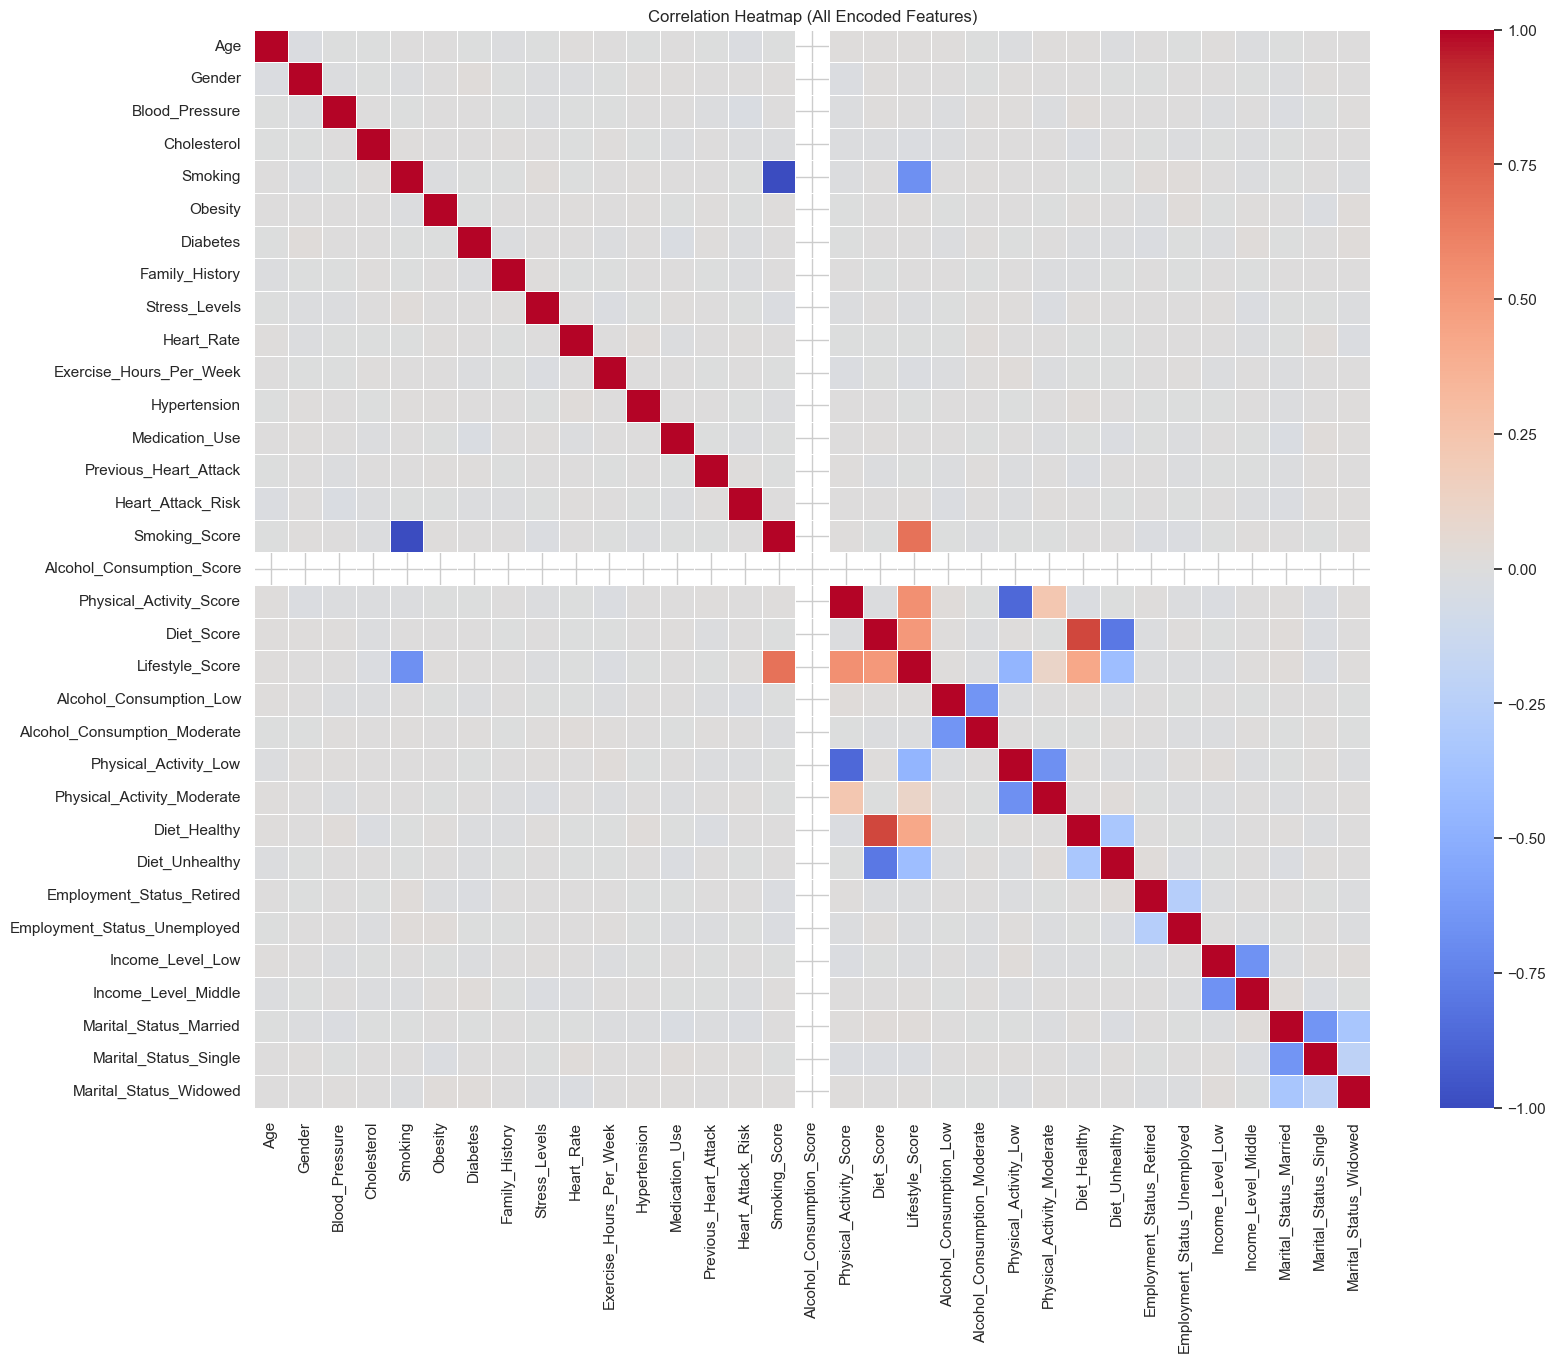

In [21]:
from sklearn.preprocessing import LabelEncoder

# Start with a fresh copy
df_encoded = df.copy()

# Step 1: Label encode binary categorical variables
binary_cols = ['Gender', 'Smoking', 'Obesity', 'Diabetes', 'Family_History', 
               'Hypertension', 'Medication_Use', 'Previous_Heart_Attack']

le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Step 2: Encode target variable
df_encoded['Heart_Attack_Risk'] = df_encoded['Heart_Attack_Risk'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# Step 3: One-hot encode multi-class categorical variables
multi_class_cols = ['Alcohol_Consumption', 'Physical_Activity', 'Diet', 
                    'Employment_Status', 'Income_Level', 'Marital_Status']

df_encoded = pd.get_dummies(df_encoded, columns=multi_class_cols, drop_first=True)

# Step 4: Drop ID column (not useful in correlation)
df_encoded = df_encoded.drop(columns=['Patient_ID'])

# Step 5: Plot correlation heatmap
plt.figure(figsize=(18, 14))
sns.heatmap(df_encoded.corr(), annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (All Encoded Features)')
plt.show()


Accuracy: 0.48

Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.93      0.65       998
           1       0.28      0.05      0.08       589
           2       0.18      0.00      0.01       413

    accuracy                           0.48      2000
   macro avg       0.32      0.33      0.25      2000
weighted avg       0.37      0.48      0.35      2000



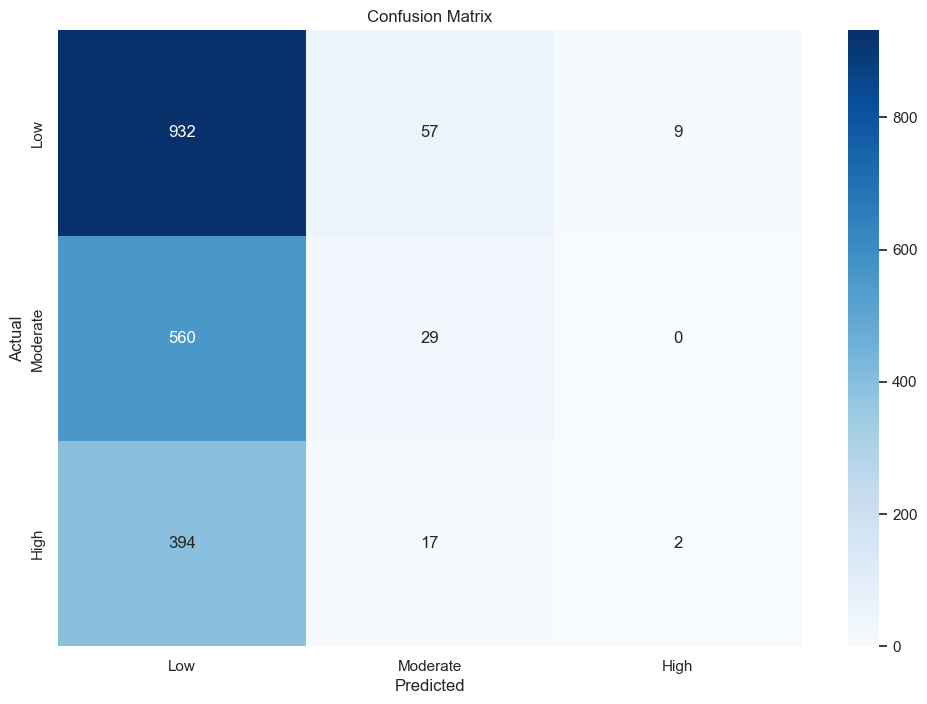

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Define features and target
X = df_encoded.drop('Heart_Attack_Risk', axis=1)
y = df_encoded['Heart_Attack_Risk']
X = X.fillna(0)


# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train a Random Forest Classifier
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# 4. Predict and evaluate
y_pred = model.predict(X_test)

# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Low', 'Moderate', 'High'], yticklabels=['Low', 'Moderate', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


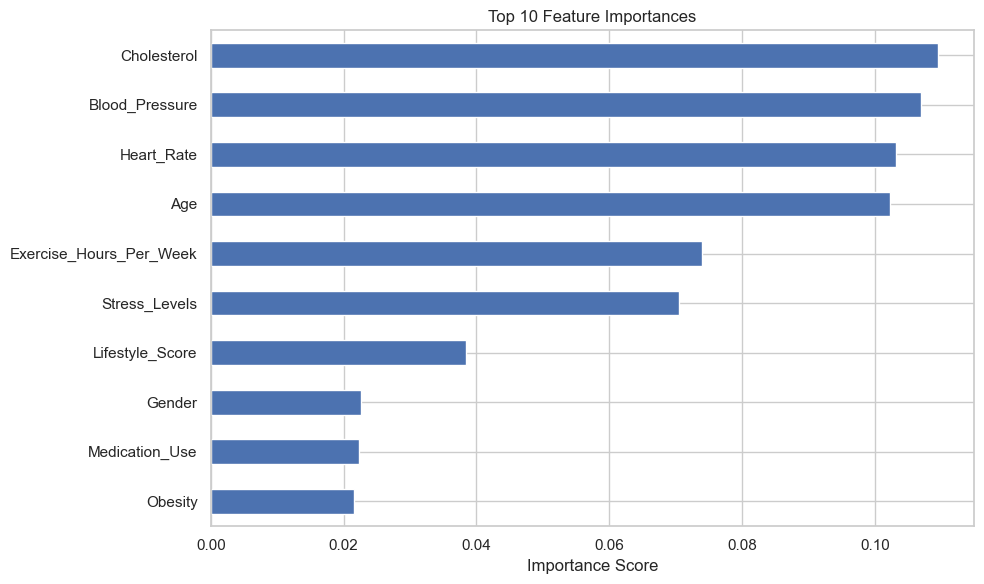

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance plot (after model.fit)
importances = model.feature_importances_
feat_names = X.columns
feat_imp_df = pd.Series(importances, index=feat_names).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feat_imp_df.head(10).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


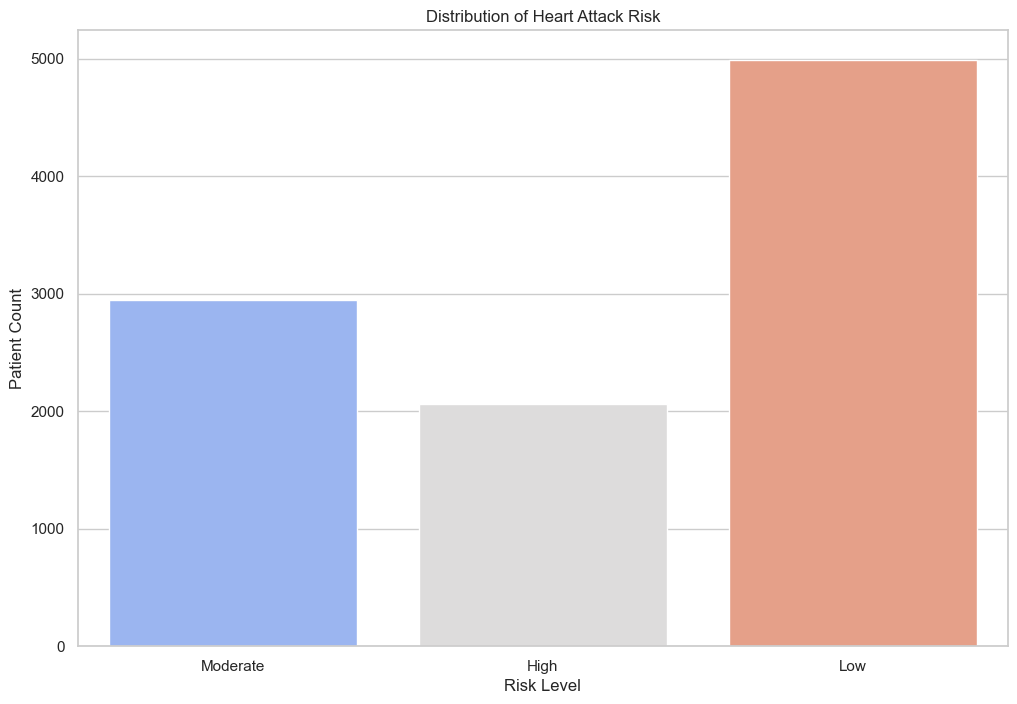

In [33]:
sns.countplot(data=df, x='Heart_Attack_Risk', palette='coolwarm')
plt.title('Distribution of Heart Attack Risk')
plt.xlabel('Risk Level')
plt.ylabel('Patient Count')
plt.show()


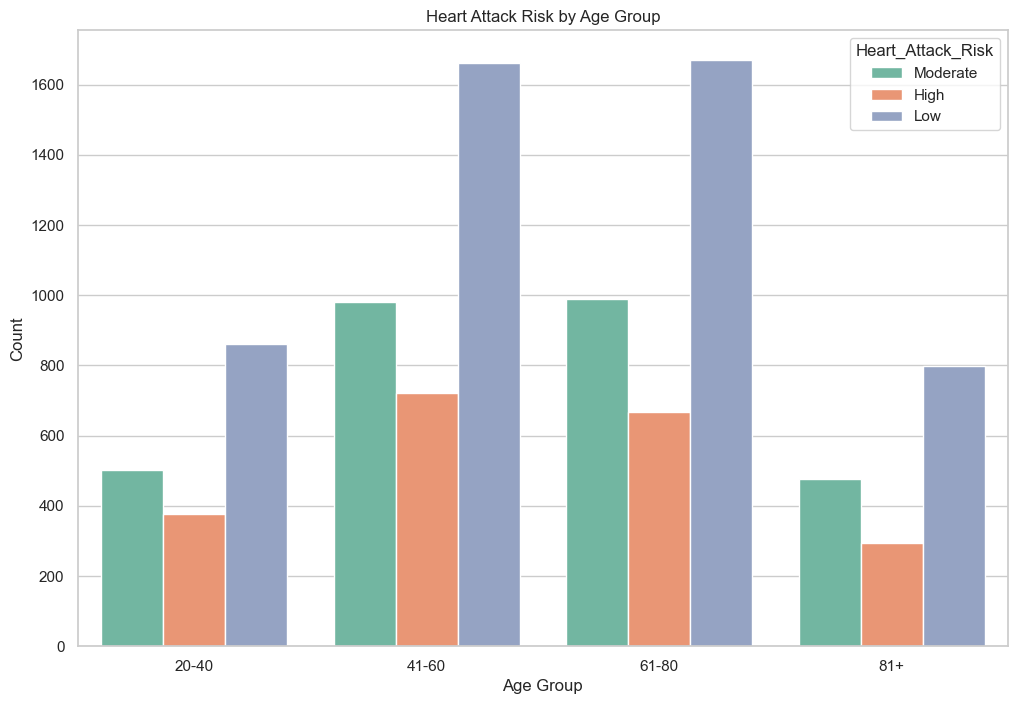

In [35]:
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 40, 60, 80, 100], labels=['20-40', '41-60', '61-80', '81+'])

sns.countplot(data=df, x='Age_Group', hue='Heart_Attack_Risk', palette='Set2')
plt.title('Heart Attack Risk by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


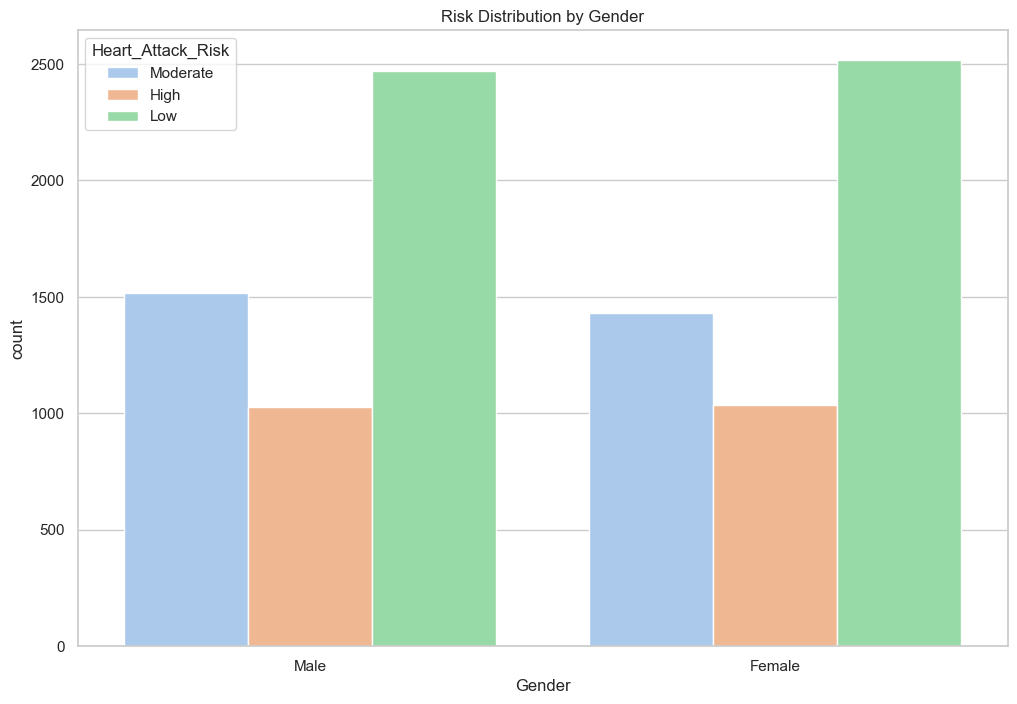

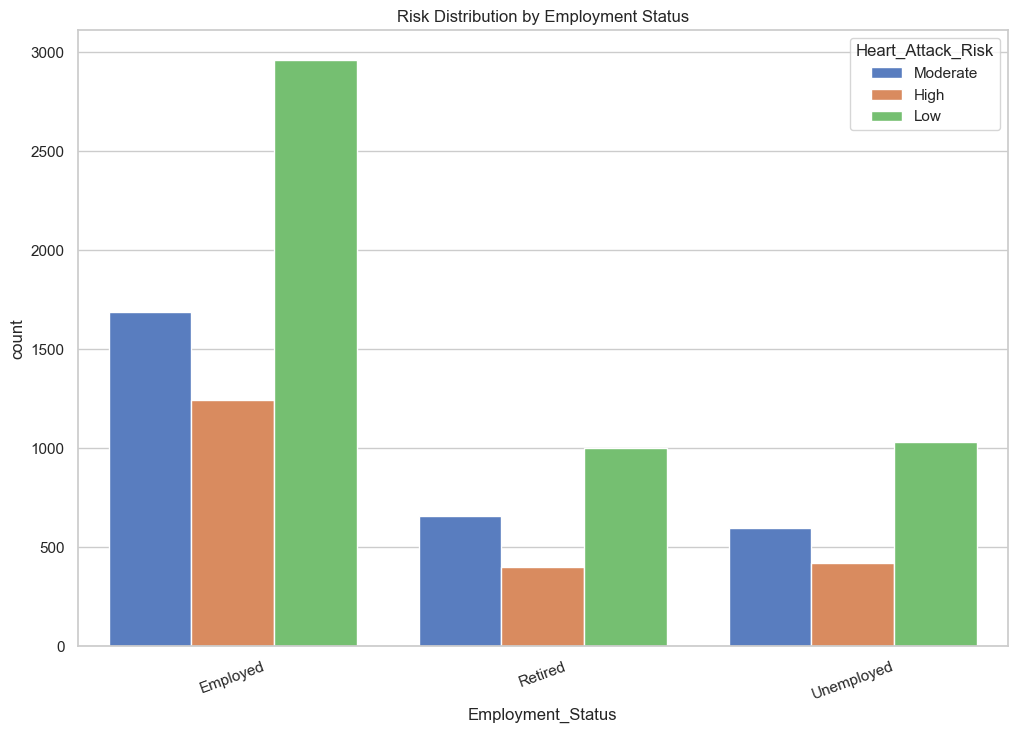

In [37]:
# Gender
sns.countplot(data=df, x='Gender', hue='Heart_Attack_Risk', palette='pastel')
plt.title('Risk Distribution by Gender')
plt.show()

# Employment Status
sns.countplot(data=df, x='Employment_Status', hue='Heart_Attack_Risk', palette='muted')
plt.title('Risk Distribution by Employment Status')
plt.xticks(rotation=20)
plt.show()


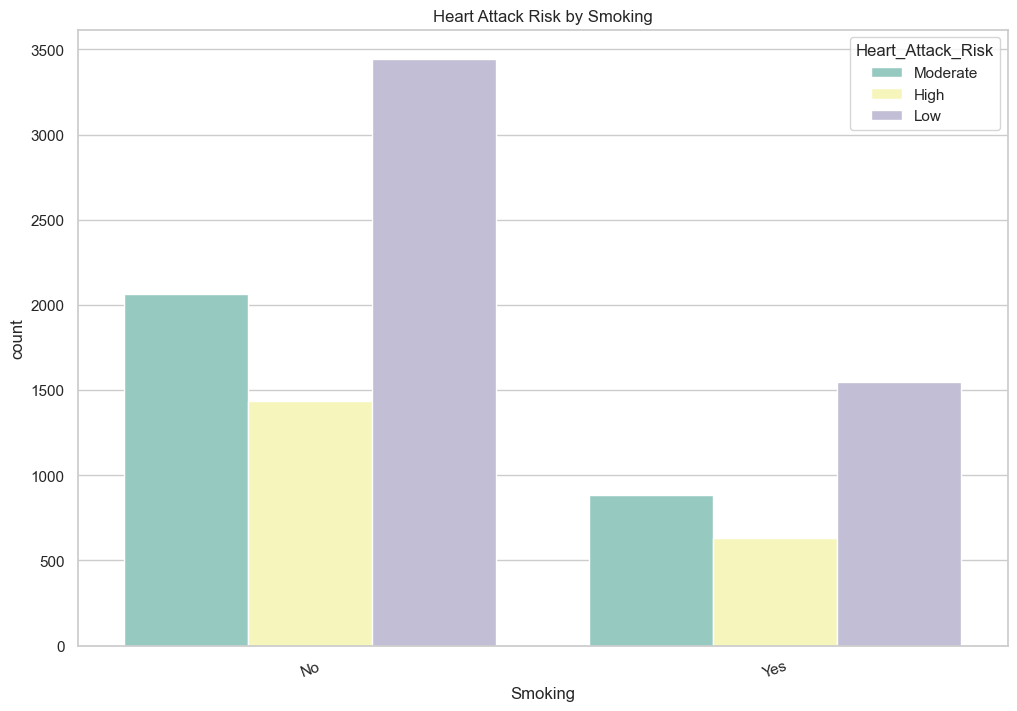

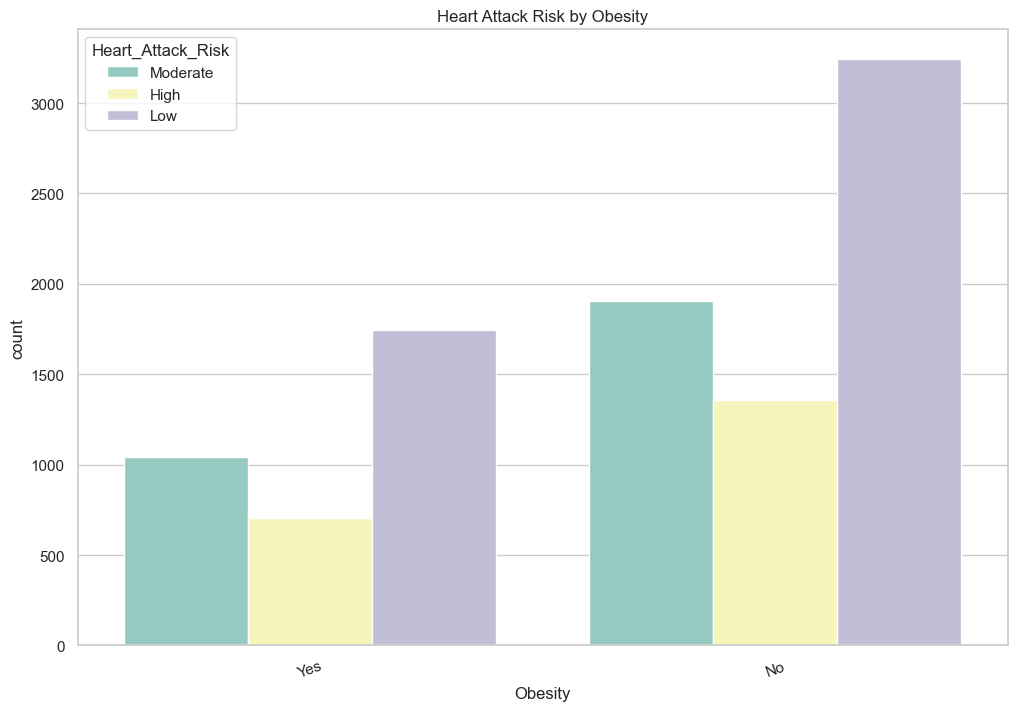

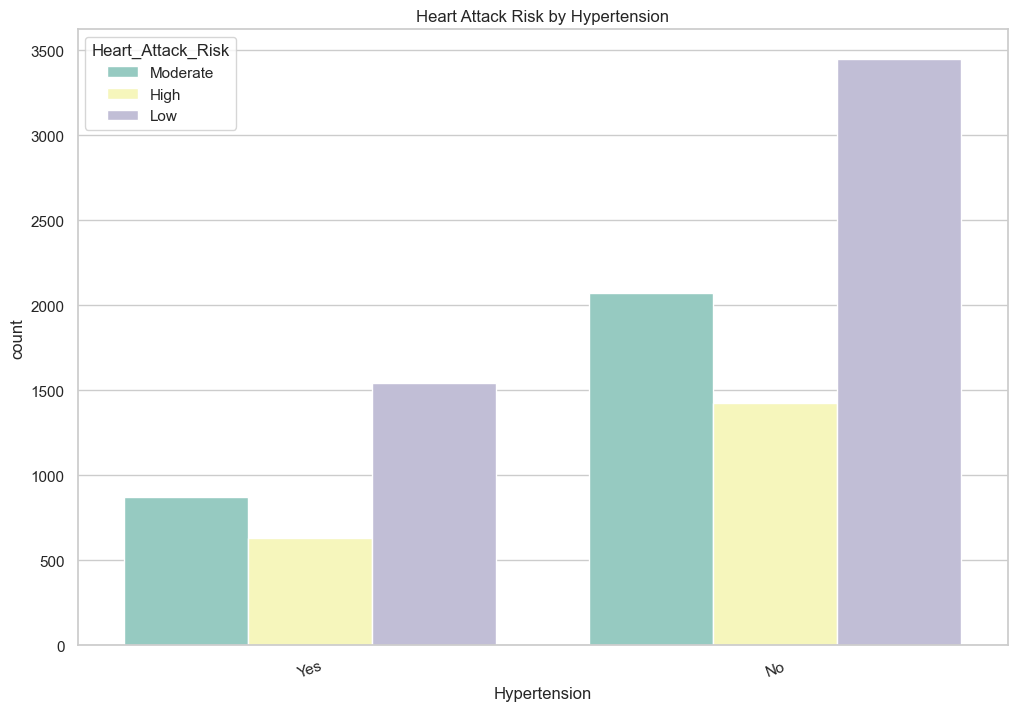

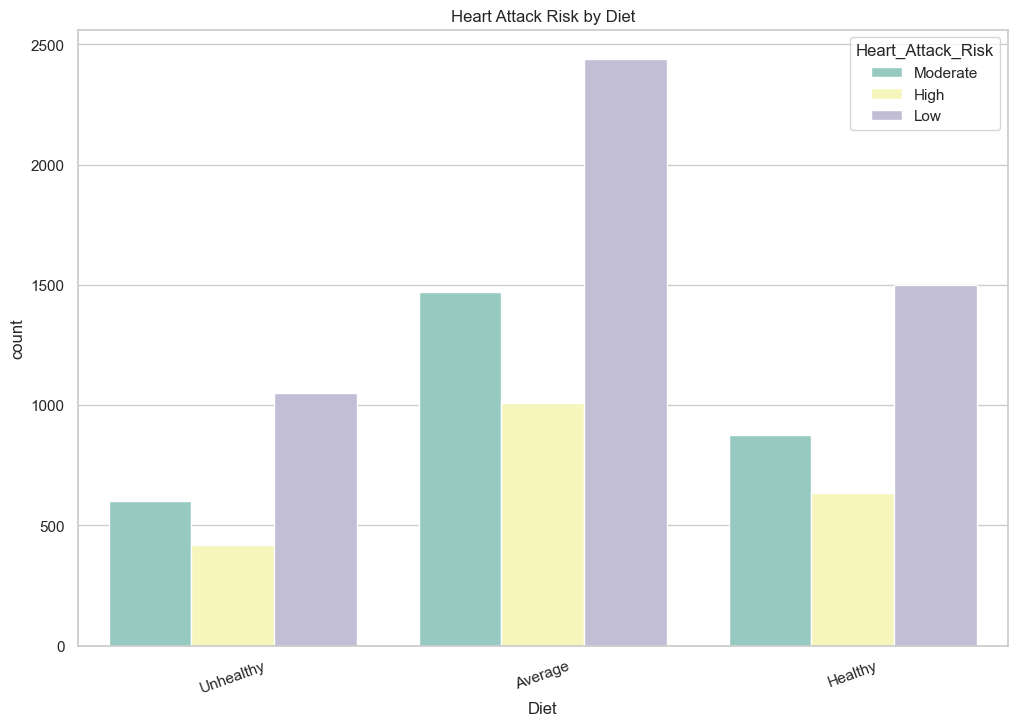

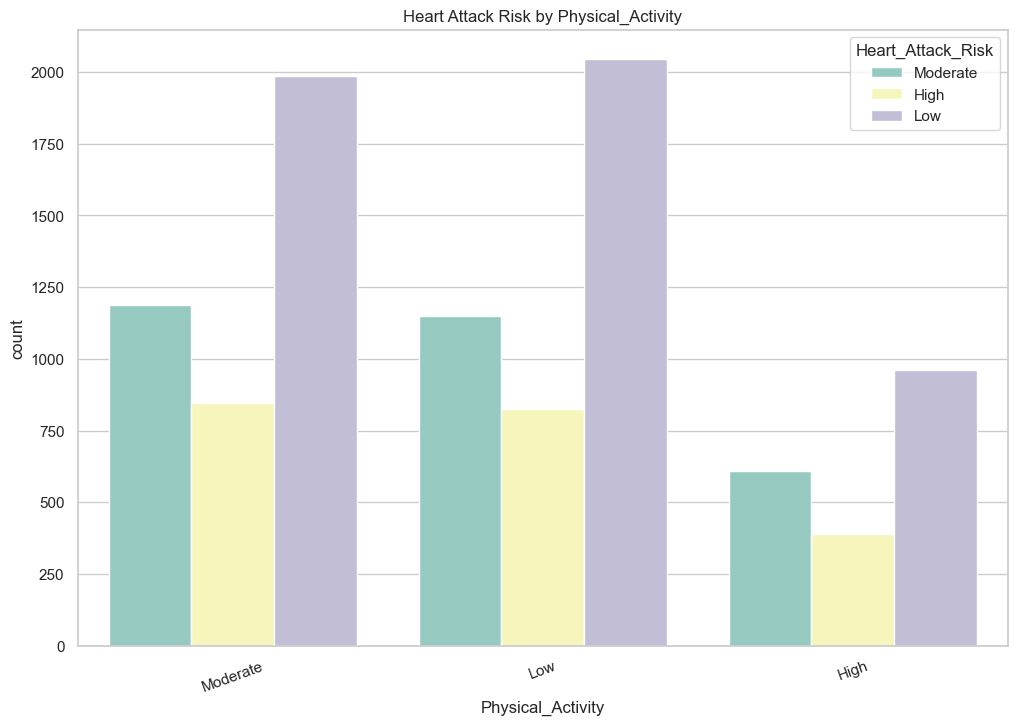

In [39]:
lifestyle_vars = ['Smoking', 'Obesity', 'Hypertension', 'Diet', 'Physical_Activity']

for col in lifestyle_vars:
    sns.countplot(data=df, x=col, hue='Heart_Attack_Risk', palette='Set3')
    plt.title(f'Heart Attack Risk by {col}')
    plt.xticks(rotation=20)
    plt.show()


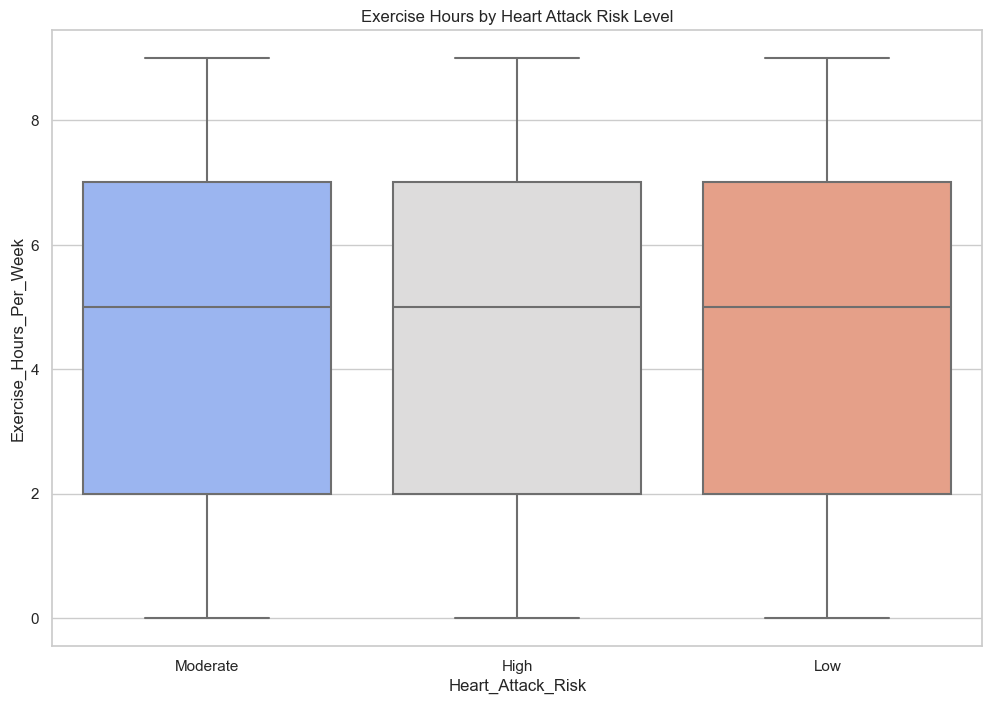

In [41]:
sns.boxplot(data=df, x='Heart_Attack_Risk', y='Exercise_Hours_Per_Week', palette='coolwarm')
plt.title('Exercise Hours by Heart Attack Risk Level')
plt.show()


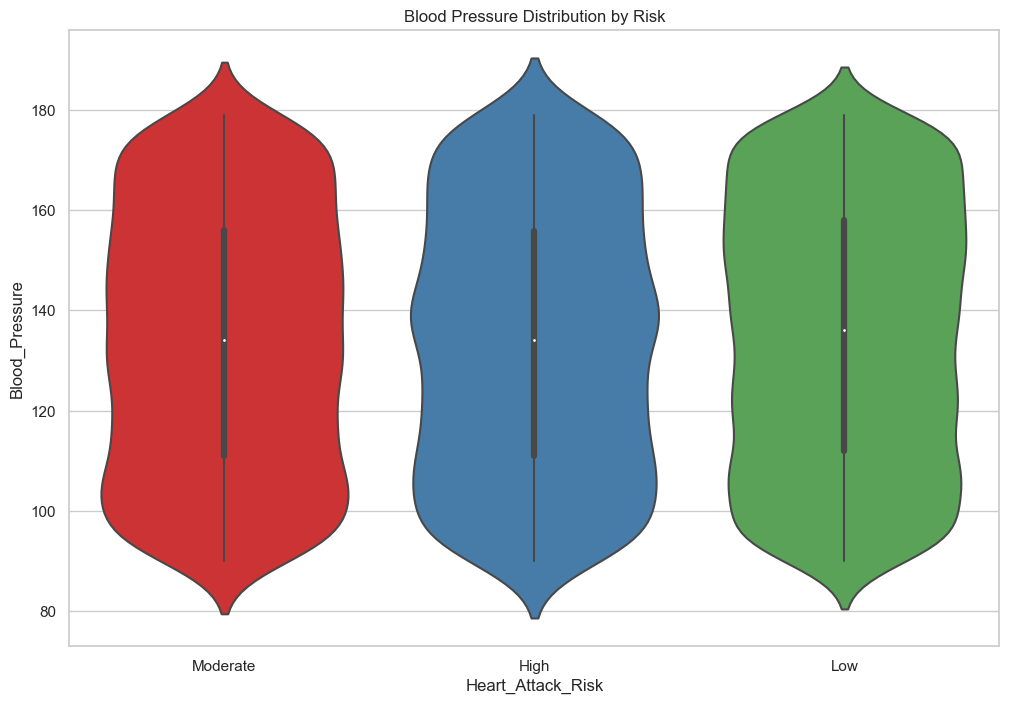

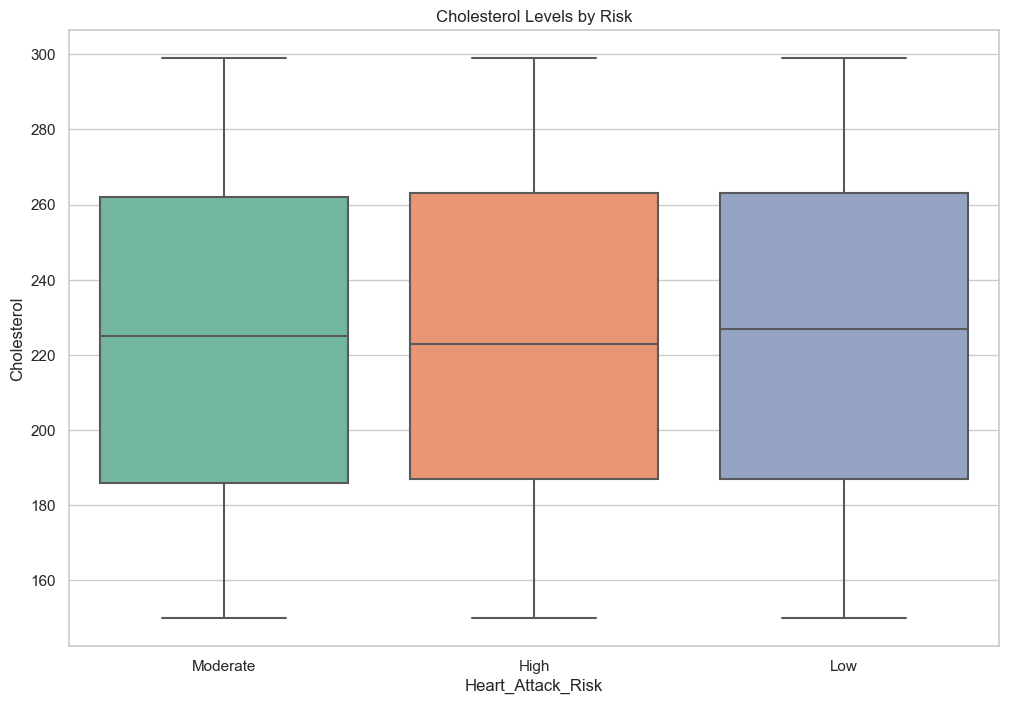

In [43]:
sns.violinplot(data=df, x='Heart_Attack_Risk', y='Blood_Pressure', palette='Set1')
plt.title('Blood Pressure Distribution by Risk')
plt.show()

sns.boxplot(data=df, x='Heart_Attack_Risk', y='Cholesterol', palette='Set2')
plt.title('Cholesterol Levels by Risk')
plt.show()
